In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
data = pd.read_csv('Titanic-Dataset.csv')

In [77]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
data.shape

(891, 12)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [80]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling Missing values

In [81]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [82]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

Drop the Cabin column

In [83]:
data = data.drop(columns='Cabin', axis=1)

In [84]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [85]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

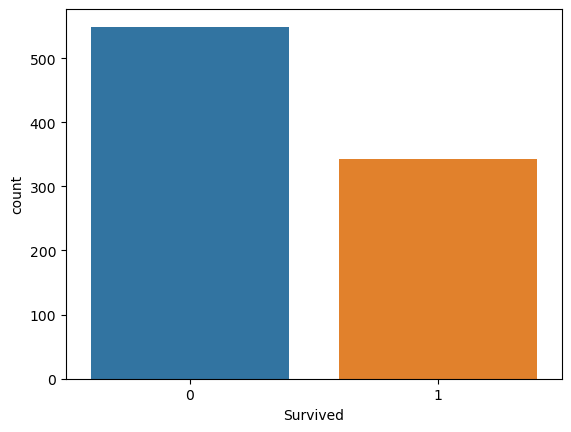

In [87]:
sns.countplot(x='Survived',data=data)
plt.show()

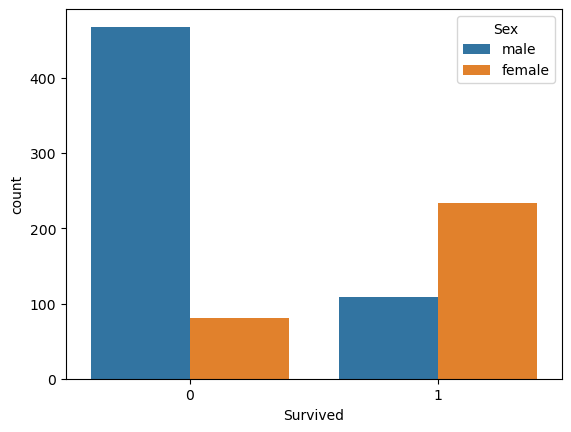

In [88]:
sns.countplot(x='Survived', hue='Sex',data=data)
plt.show()

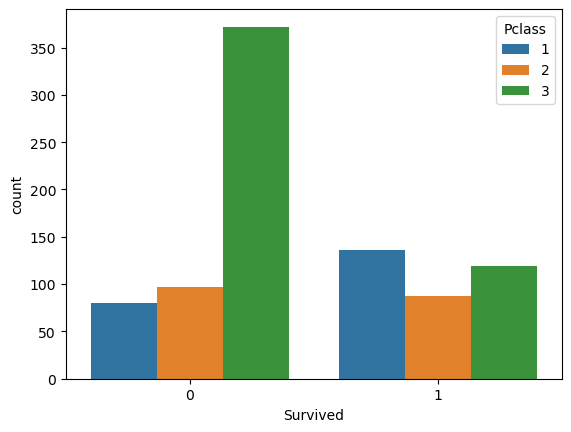

In [89]:
sns.countplot(x='Survived', hue='Pclass',data=data)
plt.show()

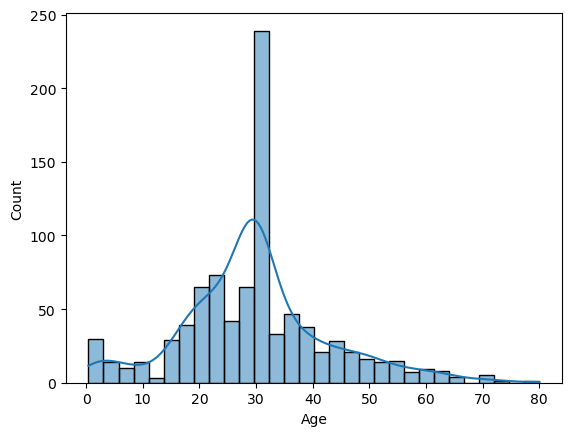

In [90]:
sns.histplot(data['Age'].dropna(), bins=30, kde=True)
plt.show()

Encoding

In [91]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
data['Pclass']=label_encoder.fit_transform(data['Pclass'])
data['Age']=label_encoder.fit_transform(data['Age'])
data['SibSp']=label_encoder.fit_transform(data['SibSp'])
data['Parch']=label_encoder.fit_transform(data['Parch'])
data['Fare']=label_encoder.fit_transform(data['Fare'])
data['Embarked']=label_encoder.fit_transform(data['Embarked'])
data['Sex']=label_encoder.fit_transform(data['Sex'])

In [92]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,28,1,0,A/5 21171,18,2
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,52,1,0,PC 17599,207,0
2,3,1,2,"Heikkinen, Miss. Laina",0,34,0,0,STON/O2. 3101282,41,2
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,48,1,0,113803,189,2
4,5,0,2,"Allen, Mr. William Henry",1,48,0,0,373450,43,2


Split into training and testing

In [93]:
X = data.drop(['Survived','Name','Ticket','PassengerId'],axis=1)
y = data['Survived']

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)

In [97]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Model evaluation

In [99]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8156424581005587


In [100]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[92 13]
 [20 54]]


In [101]:
class_report = classification_report(y_test, y_pred)
print("Classification report:\n", class_report)

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [116]:
input_data = pd.DataFrame({
    'Pclass':[3],
    'Sex':['Male'],
    'Age':[25],
    'SibSp':[1],
    'Parch':[0],
    'Fare':[7.25],
    'Embarked':['S'],
})

In [117]:
label_encoder = LabelEncoder()
input_data['Pclass']=label_encoder.fit_transform(input_data['Pclass'])
input_data['Age']=label_encoder.fit_transform(input_data['Age'])
input_data['SibSp']=label_encoder.fit_transform(input_data['SibSp'])
input_data['Parch']=label_encoder.fit_transform(input_data['Parch'])
input_data['Fare']=label_encoder.fit_transform(input_data['Fare'])
input_data['Embarked']=label_encoder.fit_transform(input_data['Embarked'])
input_data['Sex']=label_encoder.fit_transform(input_data['Sex'])

In [118]:
input_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,0,0,0,0,0


In [119]:
predictions = model.predict(input_data)
predictions=["Survived" if pred==1 else "Not Survived" for pred in predictions]
print("Prediction:",predictions)

Prediction: ['Survived']
